In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


data = pd.read_csv("bankloandatset.csv")
print(data.head())

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [4]:
for column in data.columns:
    attribute_data = data[column]

    minimum = np.min(attribute_data)
    maximum = np.max(attribute_data)
    mean = np.mean(attribute_data)
    median = np.median(attribute_data)
    std_dev = np.std(attribute_data)

    print(f"Attribute: {column}")
    print(f"Min: {minimum}")
    print(f"Max: {maximum}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print()

Attribute: ID
Min: 1
Max: 5000
Mean: 2500.5
Median: 2500.5
Standard Deviation: 1443.3756441065507

Attribute: Age
Min: 23
Max: 67
Mean: 45.3384
Median: 45.0
Standard Deviation: 11.462019256658051

Attribute: Experience
Min: -3
Max: 43
Mean: 20.1046
Median: 20.0
Standard Deviation: 11.466806828406938

Attribute: Income
Min: 8
Max: 224
Mean: 73.7742
Median: 64.0
Standard Deviation: 46.029125717962536

Attribute: ZIP.Code
Min: 9307
Max: 96651
Mean: 93152.503
Median: 93437.0
Standard Deviation: 2121.6400015061463

Attribute: Family
Min: 1
Max: 4
Mean: 2.3964
Median: 2.0
Standard Deviation: 1.1475482734944096

Attribute: CCAvg
Min: 0.0
Max: 10.0
Mean: 1.9379380000000002
Median: 1.5
Standard Deviation: 1.747484205409594

Attribute: Education
Min: 1
Max: 3
Mean: 1.881
Median: 2.0
Standard Deviation: 0.8397850915561672

Attribute: Mortgage
Min: 0
Max: 635
Mean: 56.4988
Median: 0.0
Standard Deviation: 101.70363021328197

Attribute: Personal.Loan
Min: 0
Max: 1
Mean: 0.096
Median: 0.0
Standard De

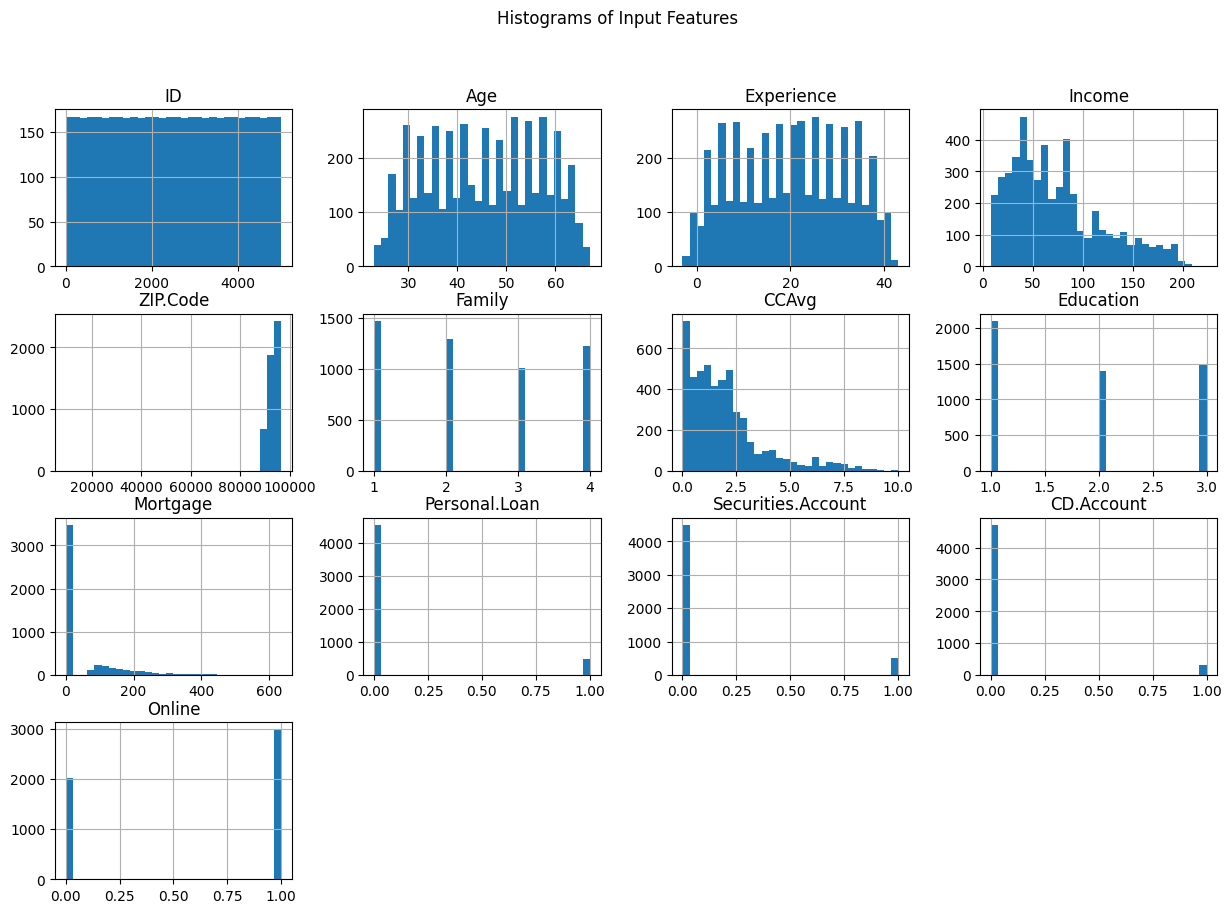

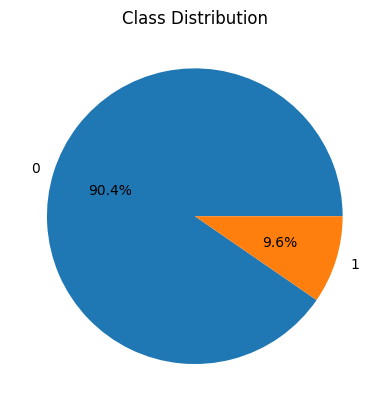

        ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal.Loan  Securities.Account  CD.Account  Online  \
0            0            

In [5]:
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

class_counts = data['Personal.Loan'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()
print(data)
# Normalization of data
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

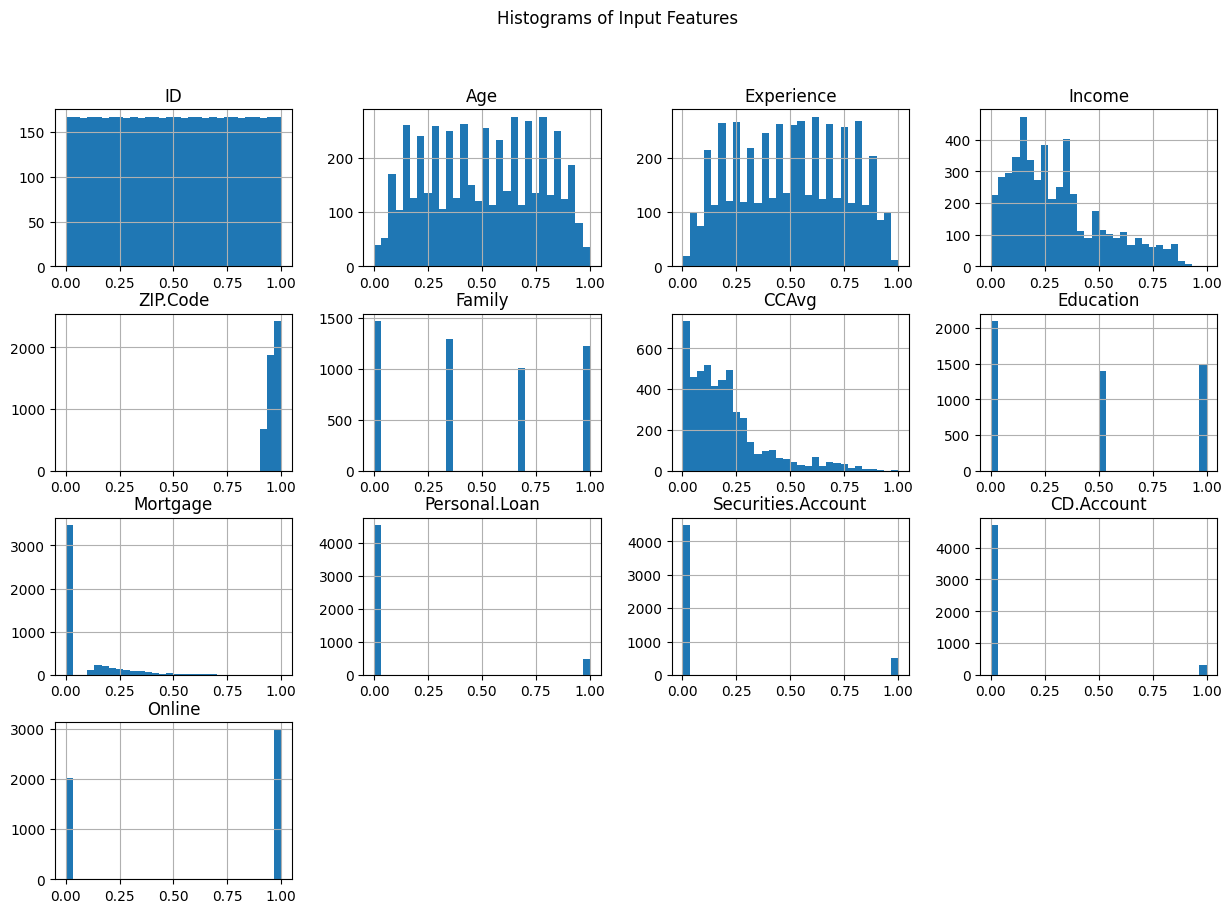

In [6]:
# Distribution of each column
input_features = normalized_data.columns[:-1]
normalized_data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

Phase 2 : Model to overfit the dataset

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Assuming X and y are your feature matrix and target variable
X = normalized_data.drop("Personal.Loan", axis=1)
y = normalized_data["Personal.Loan"]

# Normalize data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_normalized = (X - mean) / (std + 1e-8)

# Multi-Layer Model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_shape=(X_normalized.shape[1],)))
model.add(BatchNormalization())

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the multi-layer model
history = model.fit(X_normalized, y, epochs=300, verbose=1)


# Evaluate the final model
final_accuracy = model.evaluate(X_normalized, y)[1]
print(f"Final Accuracy: {final_accuracy * 100:.2f}%")


Epoch 1/300
157/157 [==============================] - 3s 3ms/step - loss: 0.4356 - accuracy: 0.8542
Epoch 2/300
157/157 [==============================] - 1s 4ms/step - loss: 0.1893 - accuracy: 0.9570
Epoch 3/300
157/157 [==============================] - 1s 5ms/step - loss: 0.1160 - accuracy: 0.9648
Epoch 4/300
157/157 [==============================] - 1s 6ms/step - loss: 0.0913 - accuracy: 0.9694
Epoch 5/300
157/157 [==============================] - 1s 6ms/step - loss: 0.0765 - accuracy: 0.9730
Epoch 6/300
157/157 [==============================] - 1s 5ms/step - loss: 0.0637 - accuracy: 0.9778
Epoch 7/300
157/157 [==============================] - 1s 6ms/step - loss: 0.0678 - accuracy: 0.9770
Epoch 8/300
157/157 [==============================] - 1s 4ms/step - loss: 0.0616 - accuracy: 0.9774
Epoch 9/300
157/157 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9822
Epoch 10/300
157/157 [==============================] - 1s 3ms/step - loss: 0.0544 - accura

Phase 3 : Model Selection and Evaluation

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Assuming X and y are your feature matrix and target variable
X = normalized_data.drop("Personal.Loan", axis=1)
y = normalized_data["Personal.Loan"]

# Normalize data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_normalized = (X - mean) / (std + 1e-8)

split_ratio = 0.8
split_index = int(len(X_normalized) * split_ratio)

X_train, y_train = X_normalized[:split_index], y[:split_index]
X_test, y_test = X_normalized[split_index:], y[split_index:]

# Logistic Regression model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_shape=(X_normalized.shape[1],)))
model.add(BatchNormalization())


# Output layer
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define model checkpointing callback
checkpoint_filepath = 'model_checkpoint.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',  # Save the model with the best validation accuracy
    mode='max',
    save_best_only=True)

# Train the model with model checkpointing
history = model.fit(X_normalized, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[model_checkpoint_callback])

# Train logistic regression model
history = model.fit(X_normalized, y, epochs=50, verbose=1)


# Evaluate the final model
final_accuracy = model.evaluate(X_normalized, y)[1]
print(f"Final Accuracy: {final_accuracy * 100:.2f}%")


Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.5117 - accuracy: 0.7533 - val_loss: 0.2457 - val_accuracy: 0.9370
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9415 - val_loss: 0.1540 - val_accuracy: 0.9520
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9513 - val_loss: 0.1108 - val_accuracy: 0.9630
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9575 - val_loss: 0.0950 - val_accuracy: 0.9680
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9638 - val_loss: 0.0890 - val_accuracy: 0.9700
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9675 - val_loss: 0.0810 - val_accuracy: 0.9730
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9718 - val_loss: 0.0772 - val_accuracy: 0.9730
Epoch 

Splitting the data into test & train and fitting the model

125/125 [==============================] - 0s 2ms/step
Accuracy on Training Set: 82.96%
32/32 [==============================] - 0s 1ms/step
Accuracy on Validation Set: 85.78%
32/32 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9800
Final Accuracy: 98.00%
32/32 [==============================] - 0s 1ms/step
Precision: 8.30%
Recall: 7.10%
F1 Score: 7.65%


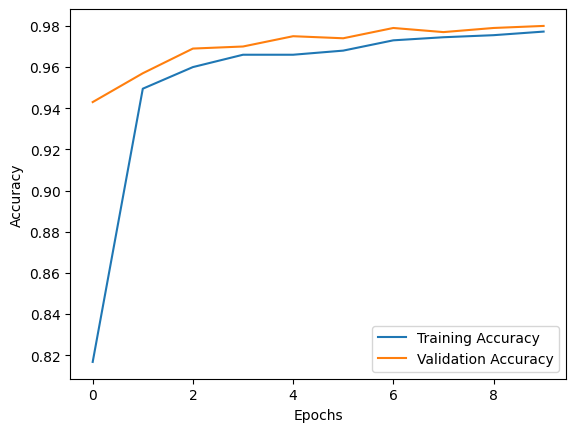

In [10]:
y = np.squeeze(np.array(y))


# Manually split data into train and test sets
split_ratio = 0.8
split_index = int(len(X_normalized) * split_ratio)

X_train, y_train = X_normalized[:split_index], y[:split_index]
X_test, y_test = X_normalized[split_index:], y[split_index:]


# Logistic Regression model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train logistic regression model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

train_probs = model.predict(X_train)
train_preds = np.round(train_probs)
train_accuracy = np.mean(np.equal(y_train, train_preds))
print(f"Accuracy on Training Set: {train_accuracy * 100:.2f}%")
test_probs = model.predict(X_test)
test_preds = np.round(test_probs)
test_accuracy = np.mean(np.equal(y_test, test_preds))
print(f"Accuracy on Validation Set: {test_accuracy * 100:.2f}%")


# Evaluate the final model on test set
final_loss, final_accuracy = model.evaluate(X_test, y_test)
print(f"Final Accuracy: {final_accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred)

# Calculate precision, recall, and F1 score
tp = np.sum((y_test == 1) & (y_pred_class == 1))
fp = np.sum((y_test == 0) & (y_pred_class == 1))
tn = np.sum((y_test == 0) & (y_pred_class == 0))
fn = np.sum((y_test == 1) & (y_pred_class == 0))

precision = tp / (tp + fp )
recall = tp / (tp + fn )
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Phase 4 : feature importance and reduction

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You

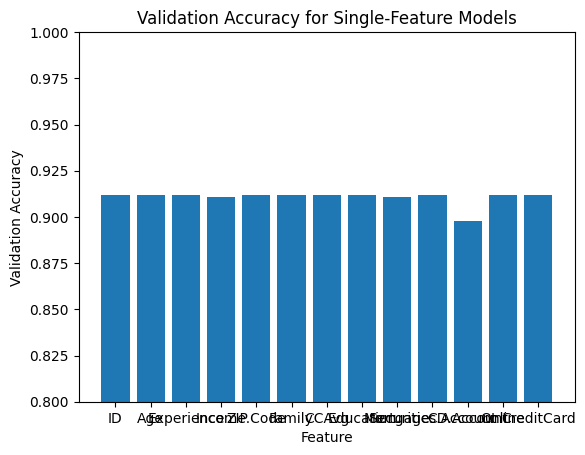

The most unimportant feature is: CD.Account


In [11]:
split_ratio_train = 0.6  # 60% for training
split_ratio_val = 0.2    # 20% for validation
split_ratio_test = 0.2   # 20% for test

split_index_train = int(len(X_normalized) * split_ratio_train)
split_index_val = split_index_train + int(len(X_normalized) * split_ratio_val)
split_index_test = split_index_val + int(len(X_normalized) * split_ratio_test)

X_train, y_train = X_normalized[:split_index_train], y[:split_index_train]
X_val, y_val = X_normalized[split_index_train:split_index_val], y[split_index_train:split_index_val]
X_test, y_test = X_normalized[split_index_val:split_index_test], y[split_index_val:split_index_test]

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Function to train a model with a specific set of features
def train_model(features, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(features),)))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

    history = model.fit(X_train[features], y_train, epochs=10, validation_data=(X_val[features], y_val), verbose=0, callbacks=[checkpoint])

    return model, history.history['val_accuracy'][-1]

# Train models with single features
feature_importance = {}

for feature in X_train.columns:
    features = [feature]
    model, accuracy = train_model(features, X_train, y_train, X_val, y_val)
    feature_importance[feature] = accuracy

# Plot the accuracies for single-feature models
plt.bar(feature_importance.keys(), feature_importance.values())
plt.ylim(0.8, 1.0)
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Single-Feature Models')
plt.show()

# Identify the most unimportant feature
most_unimportant_feature = min(feature_importance, key=feature_importance.get)
print(f"The most unimportant feature is: {most_unimportant_feature}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You

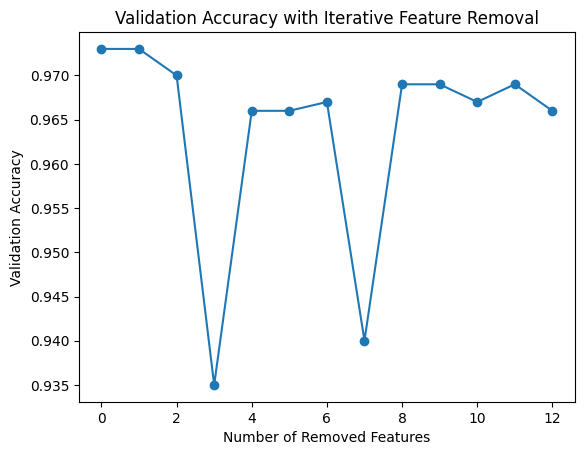

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9670
Original Model Accuracy: 0.9670000076293945


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9720
Reduced Model Accuracy: 0.972000002861023


In [12]:
# Train models with iterative feature removal
remaining_features = list(X_train.columns)
reduced_accuracies = []

while remaining_features:
    feature_to_remove = remaining_features.pop(0)
    features = [f for f in X_train.columns if f != feature_to_remove]
    model, accuracy = train_model(features, X_train, y_train, X_val, y_val)
    reduced_accuracies.append(accuracy)

# Plot the accuracies for models with iterative feature removal
plt.plot(range(0, len(X_train.columns)), reduced_accuracies, marker='o')
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with Iterative Feature Removal')
plt.show()

# Compare feature-reduced model with the original model
original_model, _ = train_model(X_train.columns, X_train, y_train, X_val, y_val)
_, original_accuracy = original_model.evaluate(X_val, y_val)
print(f"Original Model Accuracy: {original_accuracy}")

reduced_model, _ = train_model(X_train.columns[1:], X_train, y_train, X_val, y_val)
_, reduced_accuracy = reduced_model.evaluate(X_val[X_train.columns[1:]], y_val)
print(f"Reduced Model Accuracy: {reduced_accuracy}")
